<a href="https://colab.research.google.com/github/imahmwd14/RandomForestClassifierPythonFromScratch/blob/master/RandomForestClassifierTestUsingSklearnImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

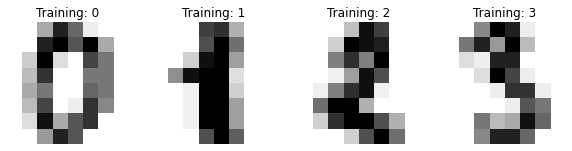

In [3]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier
clf = RandomForestClassifier(max_depth=2, random_state=0)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

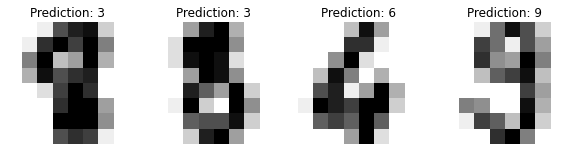

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [6]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        88
           1       0.90      0.42      0.57        91
           2       0.66      0.80      0.72        86
           3       0.55      0.82      0.66        91
           4       0.91      0.82      0.86        92
           5       0.74      0.62      0.67        91
           6       0.87      0.99      0.9

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 38  6 13  4  8  0 11  2  9]
 [ 1  0 69 13  0  0  0  2  0  1]
 [ 1  0  7 75  0  0  1  6  0  1]
 [ 7  0  0  0 75  1  6  3  0  0]
 [ 1  0  0 14  1 56  6  1  0 12]
 [ 0  0  1  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 1  4 21 14  1  8  0 12 23  4]
 [ 2  0  1  7  0  3  0  4  0 75]]


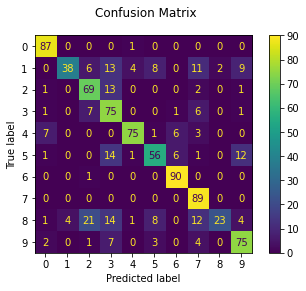

In [7]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()